---
#### ***Name : Ashuwin P***
#### ***Reg. No : 3122 22 5002 013***
#### ***Course : UIT2722 ~ Bio Inspired Optimization Techniques***
#### ***Topic : Stochastic Resonance - Image Contrast Enhancement***
#### ***Last Update : 06 November 2024***
---

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class StochasticHelper:
    def __init__(self, image_path, original_image_path):
        self.image_signal = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.original_image_signal = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
        self.threshold = np.mean(self.image_signal)

    def noise_signal(self, mean, stddev, amplitude):
        noise_signal_ = np.random.normal(mean, stddev, self.image_signal.shape)
        return amplitude * noise_signal_

    def add(self, noise_signal):
        return self.image_signal + noise_signal

    def thresholded_signal(self, result):
        thresholded_signal_result = np.zeros(self.image_signal.shape)
        thresholded_signal_result[result > self.threshold] = 255
        return thresholded_signal_result

    def generate_image(self, mean, stddev, amplitude):
        noise_signal = self.noise_signal(mean, stddev, amplitude)
        result = self.add(noise_signal)
        return self.thresholded_signal(result)

    def process(self, mean, stddev, amplitude, n=1000):
        ans = np.zeros(self.image_signal.shape)
        for _ in range(n):
            ans += self.generate_image(mean, stddev, amplitude)
        return ans / n

    def mse(self, image1, image2):
        return np.mean((image1 - image2) ** 2)

    def find_optimal_noise_intensity(self, start_amplitude=1, end_amplitude=3, step=0.1, n=1000):
        amplitudes = []
        mses = []
        best_amplitude = start_amplitude
        min_mse = float('inf')
        optimal_image = None

        for amplitude in np.arange(start_amplitude, end_amplitude, step):
            processed_image = self.process(0, 1, amplitude, n)
            error = self.mse(processed_image, self.original_image_signal)
            amplitudes.append(amplitude)
            mses.append(error)
            print(f"Amplitude: {amplitude}, MSE: {error}")
            
            if error < min_mse:
                min_mse = error
                best_amplitude = amplitude
                optimal_image = processed_image

        print(f"Optimal Noise Amplitude: {best_amplitude}, Minimum MSE: {min_mse}")
        
        plt.figure(figsize=(10, 6))
        plt.plot(amplitudes, mses, marker='o')
        plt.title('Amplitude vs MSE')
        plt.xlabel('Amplitude')
        plt.ylabel('MSE')
        plt.grid(True)
        plt.show()

        return optimal_image, best_amplitude

In [12]:
def display_image(image_path, title="Image"):
    image = plt.imread(image_path)
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

def display_histogram(image, title="Histogram"):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.show()

In [13]:
# Display original and degraded images
original_image_path = r"D:\SEM5\BIOT\SR\Mona_Lisa_GS2.jpg"
degraded_image_path = r"D:\SEM5\BIOT\SR\sam.jpg"

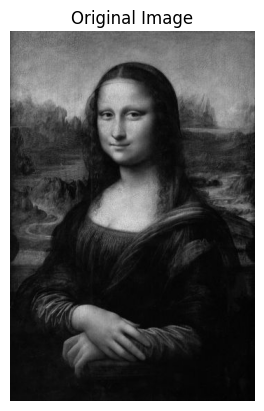

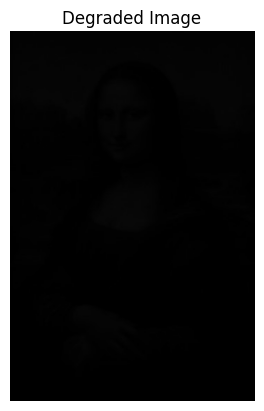

In [14]:
display_image(original_image_path, title="Original Image")
display_image(degraded_image_path, title="Degraded Image")

Amplitude: 1.0, MSE: 4828.404841489218
Amplitude: 1.1, MSE: 4686.736737303774
Amplitude: 1.2000000000000002, MSE: 4568.41393323167
Amplitude: 1.3000000000000003, MSE: 4477.243187741375
Amplitude: 1.4000000000000004, MSE: 4407.370231177899
Amplitude: 1.5000000000000004, MSE: 4349.393826881536
Amplitude: 1.6000000000000005, MSE: 4308.839679715364
Amplitude: 1.7000000000000006, MSE: 4279.920673717655
Amplitude: 1.8000000000000007, MSE: 4264.000989385445
Amplitude: 1.9000000000000008, MSE: 4252.47031464434
Amplitude: 2.000000000000001, MSE: 4251.858515365769
Amplitude: 2.100000000000001, MSE: 4255.373964872237
Amplitude: 2.200000000000001, MSE: 4262.598163789622
Amplitude: 2.300000000000001, MSE: 4277.066784911455
Amplitude: 2.4000000000000012, MSE: 4291.384180310916
Amplitude: 2.5000000000000013, MSE: 4312.9081676750675
Amplitude: 2.6000000000000014, MSE: 4333.656376580998
Amplitude: 2.7000000000000015, MSE: 4358.31555127938
Amplitude: 2.8000000000000016, MSE: 4383.12477056213
Amplitude: 

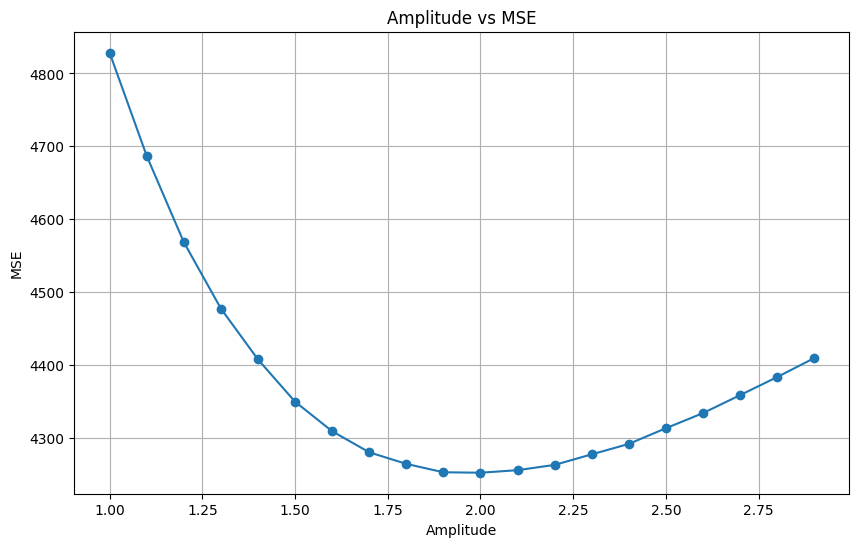

In [15]:
# Find and display the optimal noise intensity
helper = StochasticHelper(degraded_image_path, original_image_path)
optimal_image, best_amplitude = helper.find_optimal_noise_intensity(start_amplitude=1, end_amplitude=3, step=0.1)

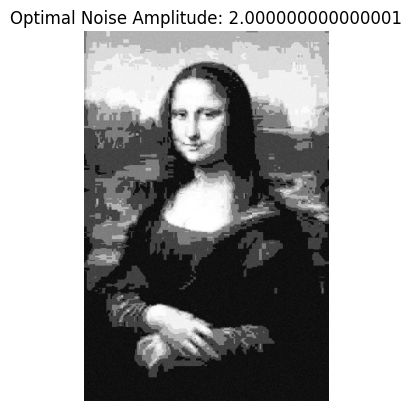

In [16]:
plt.imshow(optimal_image, cmap='gray')
plt.title(f"Optimal Noise Amplitude: {best_amplitude}")
plt.axis('off')
plt.show()

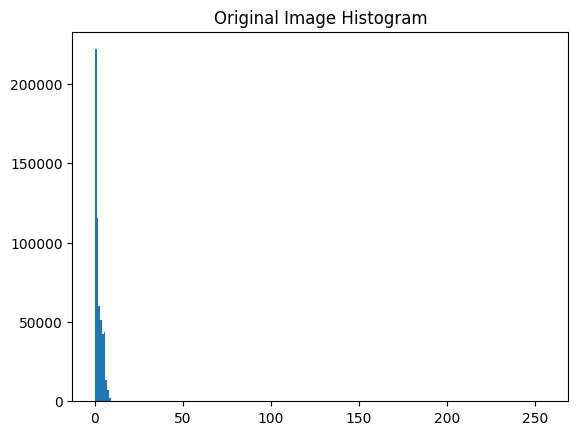

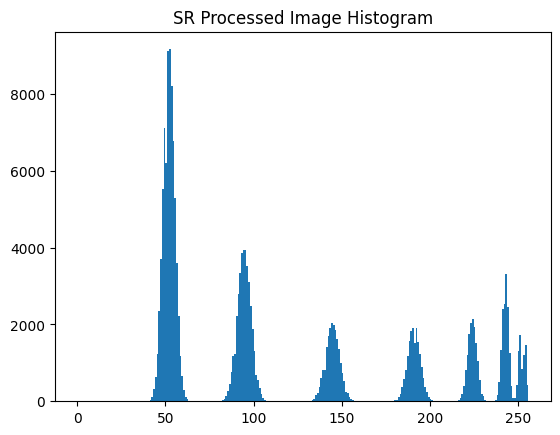

In [18]:
# Display histograms of degraded and processed images
display_histogram(plt.imread(degraded_image_path), title="Original Image Histogram")
display_histogram(optimal_image, title="SR Processed Image Histogram")